# Summary
## Demographic patterns
**Gender**

Men are more likely to practice good security habits (e.g., using a phone password and two-factor authentication).  However, men are also slightly more likely to experience cyber-security incidents, such as having fraudulent credit/debit card charges.

**Age**

Overall, younger adults are more likely to practice good security habits.  For example, adults under 51 are most likely to use a phone password, and adults between 31 and 40 are most likely to use two-factor authentication.  However, adults between 31 and 70 are also most likely to experience fraudulent charges and have their social security number compromised.

**Region**

Individuals in rural regions are the least likely to practice good security habits.  However, these individuals are also the least likely to experience cyber-security incidents, such as having fraudulent debit/credit card charges.

**Income**

Generally speaking, individuals in higher income groups ($50,000 and over) demonstrate the best security habits (e.g., using a phone password).  However, these individuals are also most likely to experience security incidents.

## Security habits vs. incidents
**Password similarity**

Overall, whether an individual’s passwords are primarily similar to or different from one another has no impact on their experience of security incidents (e.g., having their email account taken over).

**Two-factor authentication**

Counter-intuitively, individuals who use two-factor authentication are more likely to experience security incidents, such as having their email accounts taken over or fraudulent credit/debit card charges.

**Public wifi use**

There is a clear link between public wifi use and one’s experience of cyber-security incidents.  For example, individuals who check their email on public wifi are more likely to have their email account taken over.  Similarly, those who make online purchase or perform other financial transactions are more likely to have fraudulent credit/debit card charges.

**Most used password method**

For these analyses, the sample size per group is relatively small, so conclusions should be taken with caution.  These data indicate that individuals using a password management system are more likely to experience fraudulent credit/debit card charges.  Those who store their passwords in their internet browser are most likely to have their email accounts taken over.

# Setup

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Set view style

In [2]:
pd.set_option('display.max_rows', 50); pd.set_option('display.max_columns', 200)

## Read in data

In [3]:
df = pd.read_csv('cybersecurity_clean_31Jul17.txt', sep = '\t', encoding = 'utf8')

## Create age groups

In [4]:
for i in range(0,len(df.age)):
    j = df.loc[i,'age']
    if(j >= 1) & (j <= 20): df.loc[i,'age_group'] = '1-20'
    elif(j >= 21) & (j <= 30): df.loc[i,'age_group'] = '21-30'
    elif(j >= 31) & (j <= 40): df.loc[i,'age_group'] = '31-40'
    elif(j >= 41) & (j <= 50): df.loc[i,'age_group'] = '41-50'
    elif(j >= 51) & (j <= 60): df.loc[i,'age_group'] = '51-60'
    elif(j >= 61) & (j <= 70): df.loc[i,'age_group'] = '61-70'
    elif(j >= 71) & (j <= 80): df.loc[i,'age_group'] = '71-80'
    elif(j >= 81): df.loc[i,'age_group'] = '81+'
    else: df.loc[i,'age_group'] = 'other'

## Create income groups

In [5]:
for i in range(0,len(df.inc)):
    j = df.loc[i,'inc']
    if(j == 1): df.loc[i,'inc_group'] = '$0-\n10,000'
    elif(j == 2): df.loc[i,'inc_group'] = '$10,000-\n19,999'
    elif(j == 3): df.loc[i,'inc_group'] = '$20,000-\n29,999'
    elif(j == 4): df.loc[i,'inc_group'] = '$30,000-\n39,999'
    elif(j == 5): df.loc[i,'inc_group'] = '$40,000-\n49,999'
    elif(j == 6): df.loc[i,'inc_group'] = '$50,000-\n59,999'
    elif(j == 7): df.loc[i,'inc_group'] = '$75,000-\n99,999'
    elif(j == 8): df.loc[i,'inc_group'] = '$100,000-\n149,999'
    elif(j == 9): df.loc[i,'inc_group'] = '$150,000+'
    else: df.loc[i,'inc_group'] = 'Other'

# Functions

## Function to calculate proportions

**Purpose**: Creates dataframe containing the proportion of yes, no, and other responses

**Inputs**
* d: dataframe
* col_dem: column name of demographic variable
* col_YN: column name of yes/no/other variable

**Outputs**: d: dataframe with proportion of yes, no, and other responses

In [6]:
def prop_df(d, col_dem, col_YN):
    
    # Replace numeric labels with meaningful strings for graph
    d[col_YN] = d[col_YN].map({1: 'Yes', -1: 'No', 0: 'Other'})

    # Calculate number of each responses by group
    d = d.groupby([col_dem, col_YN]).ID.count()
    d = d.unstack()

    # Calculate proportions and enter into dataframe
    for index, row in d.iterrows():
    
        # for each row, calculate total yes, no, and other responses
        total_yes = 0 if np.isnan(row['Yes']) else row['Yes']
        total_no = 0 if np.isnan(row['No']) else row['No']
        total_other = 0 if np.isnan(row['Other']) else row['Other']

        # calculate total of all responses
        total_all = total_no + total_yes + total_other

        # calculate proportions
        prop_no = 0 if total_no == 0 else total_no/total_all
        prop_yes = 0 if total_yes == 0 else total_yes/total_all
        prop_other = 0 if total_other == 0 else total_other/total_all

        # enter proportions into dataframe
        d.loc[index, 'PropYes'] = prop_yes
        d.loc[index, 'PropNo'] = prop_no
        d.loc[index, 'PropOther'] = prop_other

    # Remove 'Yes', 'No', and 'Other' columns
    d = d.drop('No', 1)
    d = d.drop('Yes', 1)
    d = d.drop('Other', 1)

    # Rename proportion columns
    d = d.rename(index=str, columns={"PropYes": "Yes", "PropNo": "No", "PropOther": "Other"})
    
    return d

## Function to create bar graph

**Purpose**: Creates bar graph given inputted characteristics

**Inputs**
* d: dataframe
* stacked: boolean indicating whether bars should be stacked
* xlabel: label for x-axis
* ylabel: label for y-axis
* title: graph title
* legend: boolean indicating whether to include legend

**Outputs**: Bar graph

In [7]:
def create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title):
    d.plot(kind = 'bar', stacked = stacked, legend = legend, figsize = (12,5))
    plt.xlabel('\n' + xlabel, fontsize = 12, fontweight='bold')
    plt.xticks(rotation=0)
    plt.ylabel(ylabel + '\n', fontsize = 12, fontweight='bold')
    plt.title(title + '\n', fontsize = 14, fontweight='bold')
    if legend == True:
        if legend_title == '':
            plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
        else: 
            plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left" , title = legend_title)
    plt.tight_layout(rect=[0,0,0.75,1])
    sns.despine(trim = False)

# 0. Data overview

## Number of individuals by age

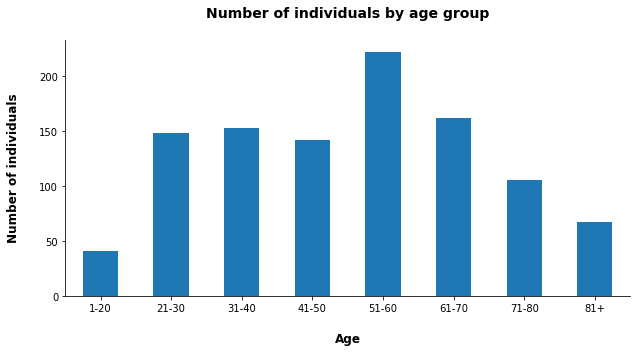

In [8]:
d = pd.DataFrame({'ID': df.ID,
     'age_group': df.age_group,})
d = d.groupby(['age_group']).ID.count()

xlabel = 'Age'
ylabel = 'Number of individuals'
title = 'Number of individuals by age group'
create_bargraph(d, False, xlabel, ylabel, title, False, '')

## Number of individuals by gender

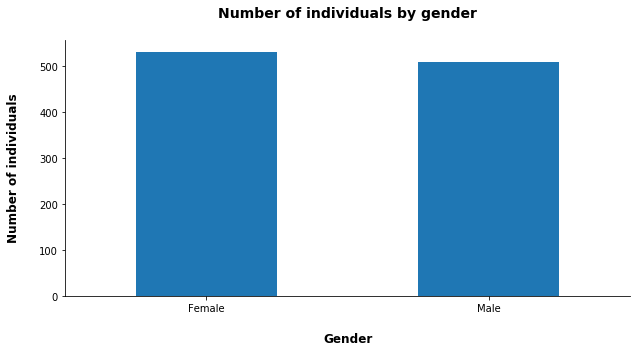

In [9]:
d = pd.DataFrame({'ID': df.ID,
     'sex': df.sex,})

d['sex'] = d['sex'].map({-1: 'Male', 1: 'Female'})
d = d.groupby(['sex']).ID.count()

xlabel = 'Gender'
ylabel = 'Number of individuals'
title = 'Number of individuals by gender'
create_bargraph(d, False, xlabel, ylabel, title, False, '')

## Number of individuals by U.S. region

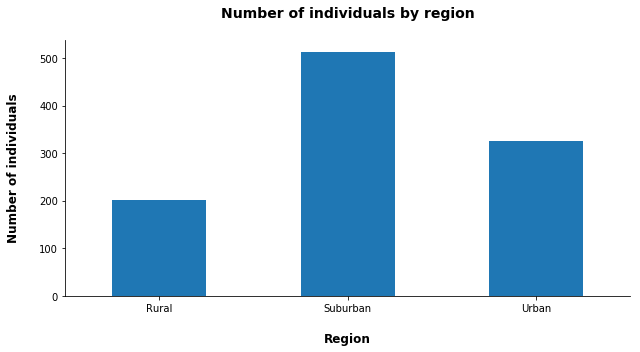

In [10]:
d = pd.DataFrame({'ID': df.ID,
     'usr': df.usr,})

d['usr'] = d['usr'].map({1: 'Rural', 2: 'Suburban', 3: 'Urban'})
d = d.groupby(['usr']).ID.count()

xlabel = 'Region'
ylabel = 'Number of individuals'
title = 'Number of individuals by region'
create_bargraph(d, False, xlabel, ylabel, title, False, '')

## Number of individuals by income

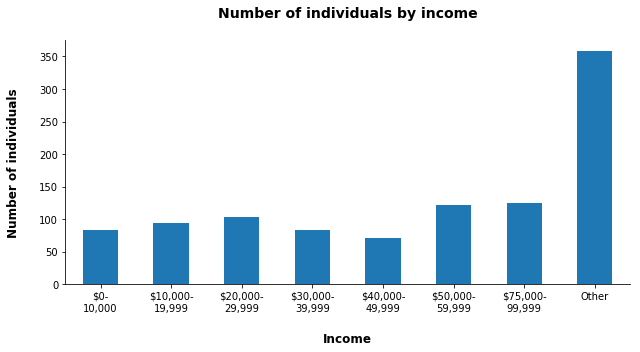

In [11]:
d = pd.DataFrame({'ID': df.ID,
     'inc_group': df.inc_group,})

d = d.groupby(['inc_group']).ID.count()

xlabel = 'Income'
ylabel = 'Number of individuals'
title = 'Number of individuals by income'
create_bargraph(d, False, xlabel, ylabel, title, False,'')

# 1. Do security practices vary by respondent demographics?

## 1A. Do men and women differ in their use of smartphone passwords?

### Conclusion
Yes, men are more likely to use phone passwords compared to women.

### Visualization

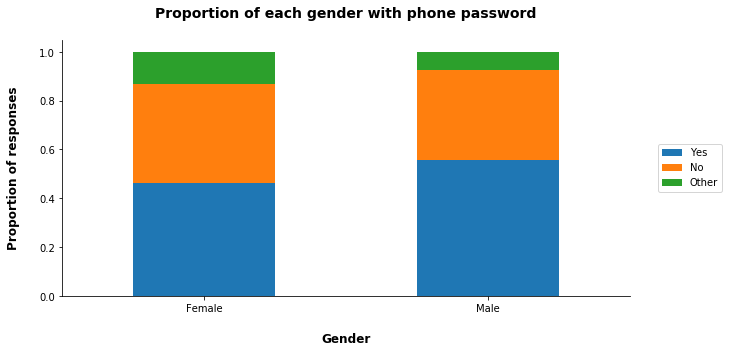

In [12]:
d = pd.DataFrame({'ID': df.ID,
     'sex': df.sex,
     'habits8': df.habits8})

# Replace numeric labels with meaningful strings for graph
d['sex'] = d['sex'].map({-1: 'Male', 1: 'Female'})

# Calculate proportions
d = prop_df(d, 'sex', 'habits8')

stacked = True
xlabel = 'Gender'
ylabel = 'Proportion of responses'
title = 'Proportion of each gender with phone password'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 1B. Do age groups differ in their use of smartphone passwords?

### Conclusion
Yes, older adults (50+ years old) are less likely to use a smartphone password compared to younger adults.  Adults under 21 are more likely to use a smartphone password.

### Visualization

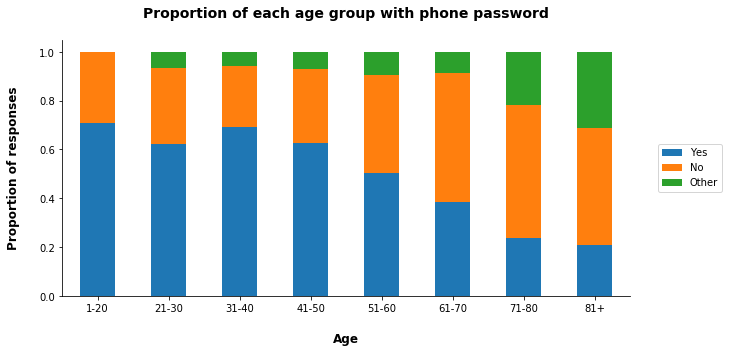

In [13]:
d = pd.DataFrame({'ID': df.ID,
     'age_group': df.age_group,
     'habits8': df.habits8})

# Calculate proportions
d = prop_df(d, 'age_group', 'habits8')

stacked = True
xlabel = 'Age'
ylabel = 'Proportion of responses'
title = 'Proportion of each age group with phone password'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 1C. Do U.S. regions differ in their use of smartphone passwords?

### Conclusion
Yes, individuals in rural regions are the least likely to use a smartphone password.

### Visualization

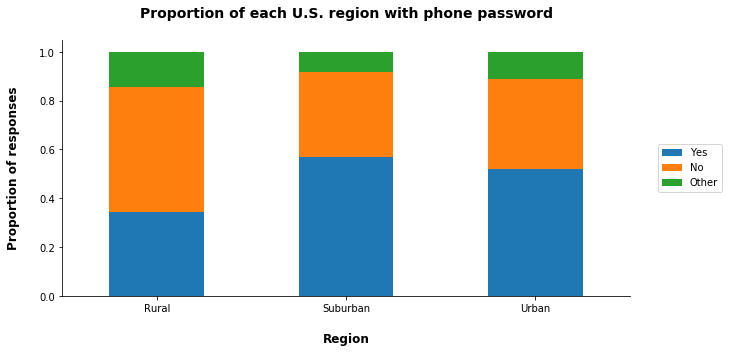

In [14]:
d = pd.DataFrame({'ID': df.ID,
     'usr': df.usr,
     'habits8': df.habits8})

d['usr'] = d['usr'].map({1: 'Rural', 2: 'Suburban', 3: 'Urban'})

# Calculate proportions
d = prop_df(d, 'usr', 'habits8')

stacked = True
xlabel = 'Region'
ylabel = 'Proportion of responses'
title = 'Proportion of each U.S. region with phone password'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 1D. Do income groups differ in their use of smartphone passwords?

### Conclusion
Yes, individuals earning between \$40,000 and \$100,000 are the most likely to use a smartphone password.  Individuals in lower income groups (under \$40,000) are less likely.

### Visualization

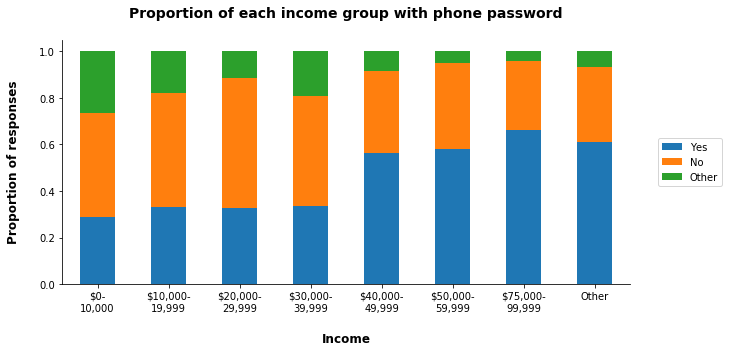

In [15]:
d = pd.DataFrame({'ID': df.ID,
     'inc_group': df.inc_group,
     'habits8': df.habits8})

# Calculate proportions
d = prop_df(d, 'inc_group', 'habits8')

stacked = True
xlabel = 'Income'
ylabel = 'Proportion of responses'
title = 'Proportion of each income group with phone password'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 1E. Do men and women differ in their use of two-factor authentication?

### Conclusion
Yes, men are more likely use two-factor authentication compared to women.

### Visualization

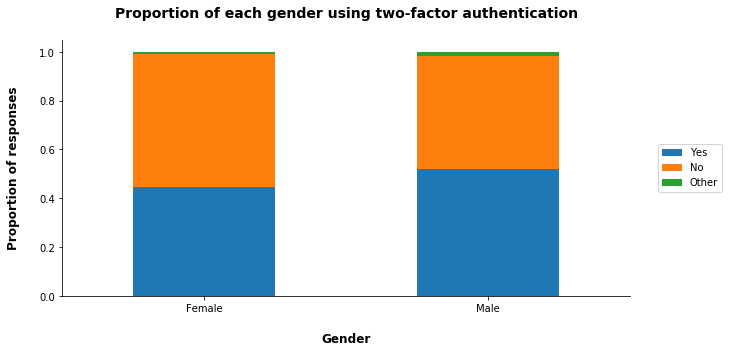

In [16]:
d = pd.DataFrame({'ID': df.ID,
     'sex': df.sex,
     'habits6': df.habits6})

# Replace numeric labels with meaningful strings for graph
d['sex'] = d['sex'].map({-1: 'Male', 1: 'Female'})

# Calculate proportions
d = prop_df(d, 'sex', 'habits6')

stacked = True
xlabel = 'Gender'
ylabel = 'Proportion of responses'
title = 'Proportion of each gender using two-factor authentication'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 1F. Do age groups differ in their use of two-factor authentication?

### Conclusion
Yes, adults between the ages of 31 and 40 are the most likely to use two-factor authentication.  Adults over 60 years old are the least likely.

### Visualization

### Use two-factor authentication

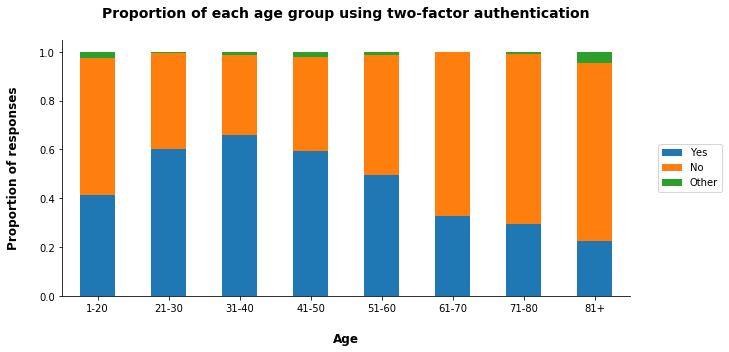

In [17]:
d = pd.DataFrame({'ID': df.ID,
     'age_group': df.age_group,
     'habits6': df.habits6})

# Calculate proportions
d = prop_df(d, 'age_group', 'habits6')

stacked = True
xlabel = 'Age'
ylabel = 'Proportion of responses'
title = 'Proportion of each age group using two-factor authentication'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 1G. Do U.S. regions differ in their use of two-factor authentication?

### Conclusion
Yes, individuals in rural regions are the least likely to use two-factor authentication, compared to individuals in suburban and urban regions.

### Visualization

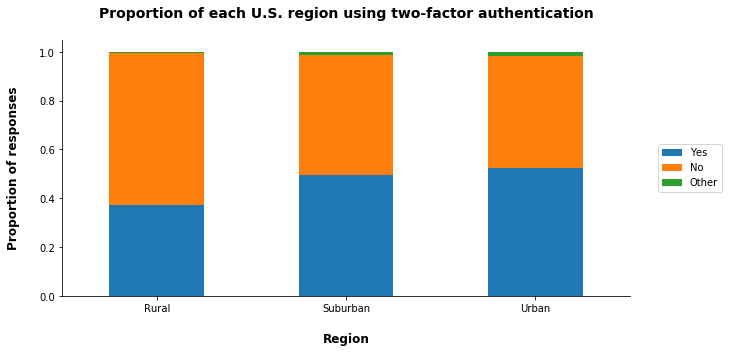

In [18]:
d = pd.DataFrame({'ID': df.ID,
     'usr': df.usr,
     'habits6': df.habits6})

# Replace numeric labels with meaningful strings for graph
d['usr'] = d['usr'].map({1: 'Rural', 2: 'Suburban', 3: 'Urban'})

# Calculate proportions
d = prop_df(d, 'usr', 'habits6')

stacked = True
xlabel = 'Region'
ylabel = 'Proportion of responses'
title = 'Proportion of each U.S. region using two-factor authentication'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 1H. Do income groups differ in their use of two-factor authentication?

### Conclusion
Yes, individuals in the lowest income groups (under \$20,000) are the least likely to use two-factor authentication.  Individuals earning between \$50,000 and \$100,000 are the most likely.

### Visualization

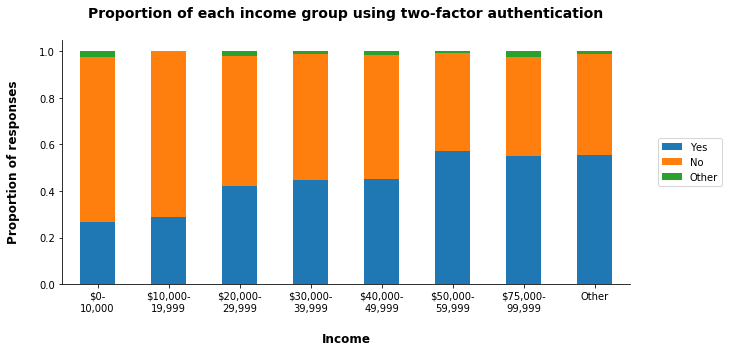

In [19]:
d = pd.DataFrame({'ID': df.ID,
     'inc_group': df.inc_group,
     'habits6': df.habits6})

# Calculate proportions
d = prop_df(d, 'inc_group', 'habits6')

stacked = True
xlabel = 'Income'
ylabel = 'Proportion of responses'
title = 'Proportion of each income group using two-factor authentication'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

# 2. Does the rate of security incident experiences vary by respondent demographics?

## 2A. Do men and women differ in their experience of fraudulent credit/debit card charges?

### Conclusion
Yes, men are slightly more likely to have had fraudulent charges on their credit/debit card(s), though the difference between genders is small.

### Visualization

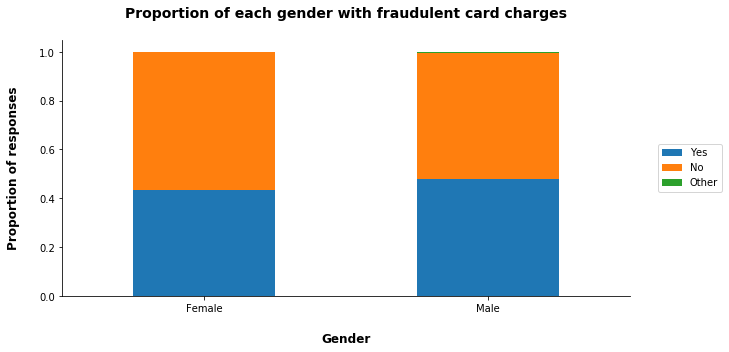

In [20]:
d = pd.DataFrame({'ID': df.ID,
     'sex': df.sex,
     'secur2c': df.secur2c})

# Replace numeric labels with meaningful strings for graph
d['sex'] = d['sex'].map({-1: 'Male', 1: 'Female'})

# Calculate proportions
d = prop_df(d, 'sex', 'secur2c')

stacked = True
xlabel = 'Gender'
ylabel = 'Proportion of responses'
title = 'Proportion of each gender with fraudulent card charges'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 2B. Do age groups differ in their experience of fraudulent credit/debit card charges?

### Conclusion
Yes, adults under 21 are the least likely to have had fraudulent charges on their credit/debit card(s).  Adults between the ages of 31 and 70 are the most likely.

### Visualization

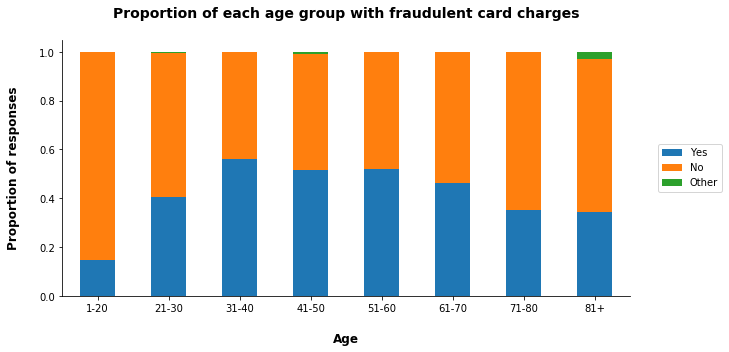

In [21]:
d = pd.DataFrame({'ID': df.ID,
     'age_group': df.age_group,
     'secur2c': df.secur2c})

# Calculate proportions
d = prop_df(d, 'age_group', 'secur2c')

stacked = True
xlabel = 'Age'
ylabel = 'Proportion of responses'
title = 'Proportion of each age group with fraudulent card charges'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 2C. Do U.S. regions differ in their experience of fraudulent credit/debit card charges?

### Conclusion
Yes, individuals in rural regions are the least likely to have experienced fraudulent credit/debit card charges.

### Visualization

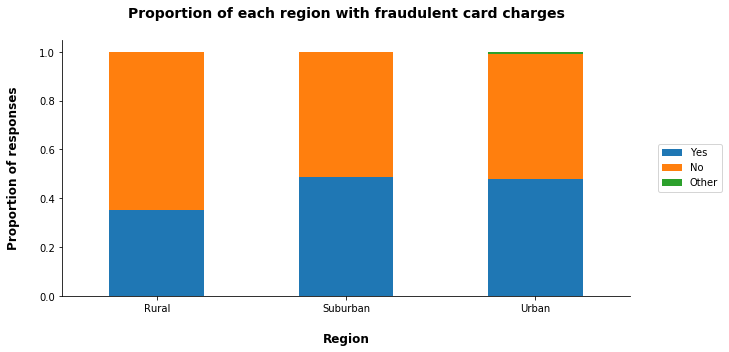

In [22]:
d = pd.DataFrame({'ID': df.ID,
     'usr': df.usr,
     'secur2c': df.secur2c})

# Replace numeric labels with meaningful strings for graph
d['usr'] = d['usr'].map({1: 'Rural', 2: 'Suburban', 3: 'Urban'})

# Calculate proportions
d = prop_df(d, 'usr', 'secur2c')

stacked = True
xlabel = 'Region'
ylabel = 'Proportion of responses'
title = 'Proportion of each region with fraudulent card charges'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 2D. Do income groups differ in their experience of fraudulent credit/debit card charges?

### Conclusion
Yes, individuals earning under \$20,000 are the least likely to have had fraudulent charges on their credit/debit card(s).  Individuals earning between \$50,000 and \$100,000 are the most likely.

### Visualization

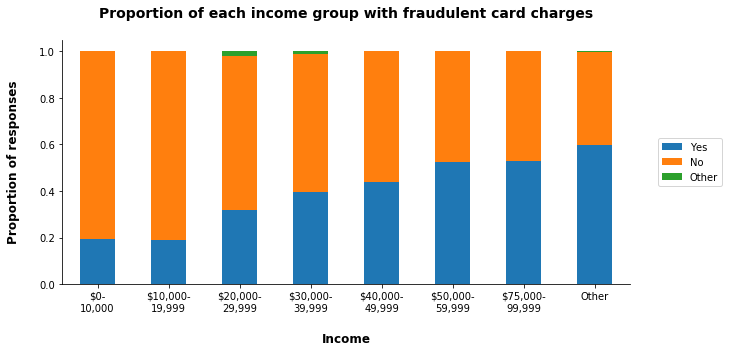

In [23]:
d = pd.DataFrame({'ID': df.ID,
     'inc_group': df.inc_group,
     'secur2c': df.secur2c})

# Calculate proportions
d = prop_df(d, 'inc_group', 'secur2c')

stacked = True
xlabel = 'Income'
ylabel = 'Proportion of responses'
title = 'Proportion of each income group with fraudulent card charges'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend,'')

## 2E. Do men and women differ in their experience of having their social security number compromised?

### Conclusion
No, men and women are about equally likely to have had their social security number compromised.

### Visualization

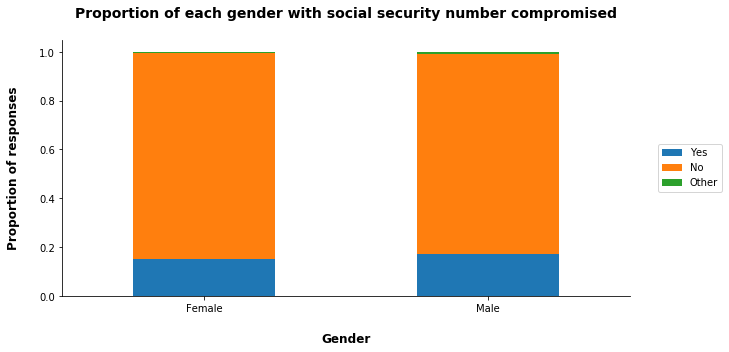

In [24]:
d = pd.DataFrame({'ID': df.ID,
     'sex': df.sex,
     'secur2a': df.secur2a})

# Replace numeric labels with meaningful strings for graph
d['sex'] = d['sex'].map({-1: 'Male', 1: 'Female'})

# Calculate proportions
d = prop_df(d, 'sex', 'secur2a')

stacked = True
xlabel = 'Gender'
ylabel = 'Proportion of responses'
title = 'Proportion of each gender with social security number compromised'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 2F. Do age groups differ in their experience of having their social security number compromised?

### Conclusion
Yes, adults between the ages of 31 and 60 are the most likely to have had their social security number compromised.  Adults under 30 and adults over 60 are the least likely.

### Visualization

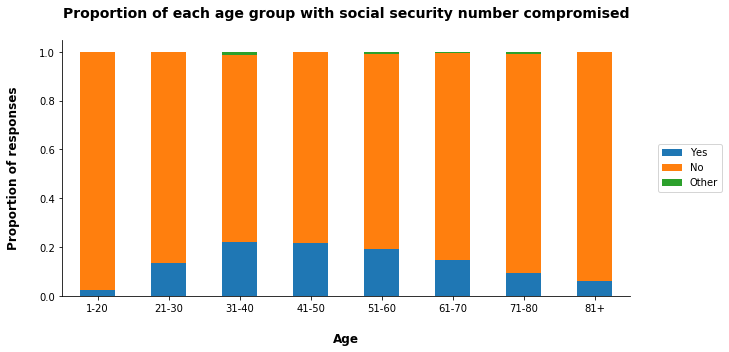

In [25]:
d = pd.DataFrame({'ID': df.ID,
     'age_group': df.age_group,
     'secur2a': df.secur2a})

# Calculate proportions
d = prop_df(d, 'age_group', 'secur2a')

stacked = True
xlabel = 'Age'
ylabel = 'Proportion of responses'
title = 'Proportion of each age group with social security number compromised'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 2G. Do U.S. regions differ in their experience of having their social security number compromised?

### Conclusion
Overall, the rates of having one's social security number compromised are low.  However, individuals in rural regions are the least likely to have had their social security number compromised.

### Visualization

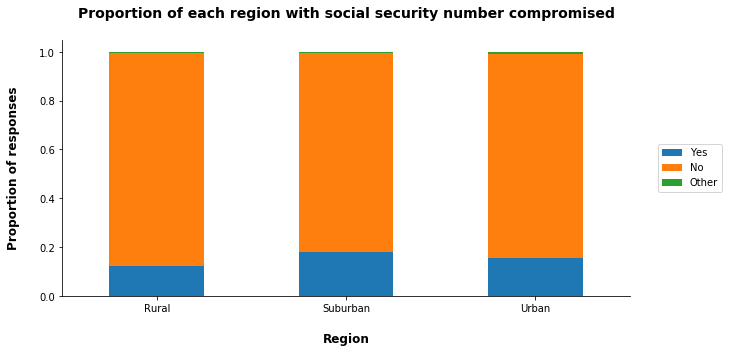

In [26]:
d = pd.DataFrame({'ID': df.ID,
     'usr': df.usr,
     'secur2a': df.secur2a})

# Replace numeric labels with meaningful strings for graph
d['usr'] = d['usr'].map({1: 'Rural', 2: 'Suburban', 3: 'Urban'})

# Calculate proportions
d = prop_df(d, 'usr', 'secur2a')

stacked = True
xlabel = 'Region'
ylabel = 'Proportion of responses'
title = 'Proportion of each region with social security number compromised'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

## 2H. Do income groups differ in their experience of having their social security number compromised?

### Conclusion
Overall, the rates of having one's social security number compromised are low.  However, individuals earning between \$50,000 and \$59,999 are the most likely to have had their SSN compromised.  Individuals earning between \$10,000 and \$19,999 are the least likely.

### Visualization

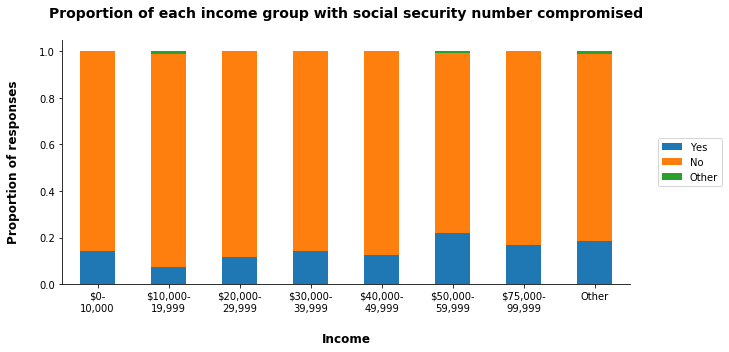

In [27]:
d = pd.DataFrame({'ID': df.ID,
     'inc_group': df.inc_group,
     'secur2a': df.secur2a})

# Calculate proportions
d = prop_df(d, 'inc_group', 'secur2a')

stacked = True
xlabel = 'Income'
ylabel = 'Proportion of responses'
title = 'Proportion of each income group with social security number compromised'
legend = True

create_bargraph(d, stacked, xlabel, ylabel, title, legend, '')

# 3. Is there a relationship between security habits and the rate of security incident experiences?

## 3A. Does an individual's password similarity influence their likelihood of having their email account taken over?

### Conclusion
No, individuals with passwords that are mostly different from each other are equally likely to have their email account taken over as those with passwords that are mostly similar.

### Visualization

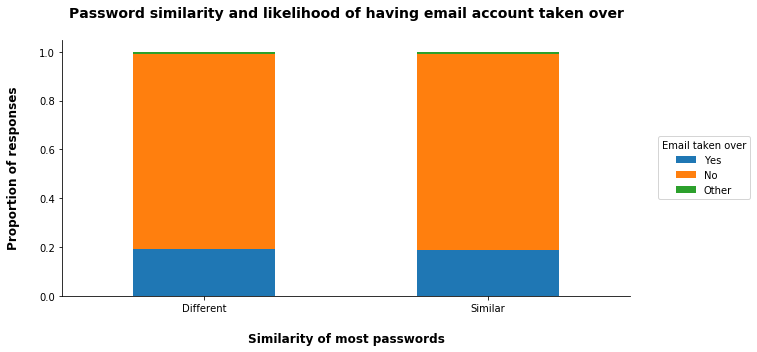

In [28]:
d = pd.DataFrame({'ID': df.ID,
     'secur2d': df.secur2d, # email hacked
     'habits3': df.habits3}) # PW similarity

d['habits3'] = d['habits3'].map({1: 'Similar', 2: 'Different'})

d = prop_df(d, 'habits3', 'secur2d')

stacked = True
xlabel = 'Similarity of most passwords'
ylabel = 'Proportion of responses'
title = 'Password similarity and likelihood of having email account taken over'
legend = True
legend_title = 'Email taken over'

create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title)

## 3B. Does an individual's use of two-factor authentication influence their likelihood of having their email account taken over?

### Conclusion
Yes.  Counter-intuitively, individuals who use two-factor authentication are slightly *more* likely to have had their email account taken over compared to those who don't use two-factor authentication.

### Visualization

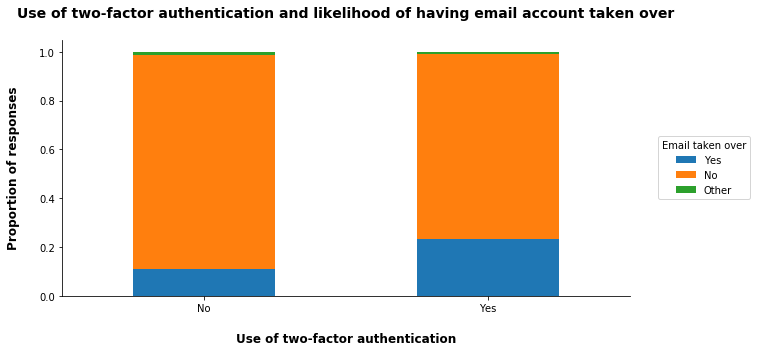

In [29]:
d = pd.DataFrame({'ID': df.ID,
     'secur2d': df.secur2d, # email hacked
     'habits6': df.habits6}) # use of two-factor authentication

d = d[d.habits6 != 0]

d['habits6'] = d['habits6'].map({1: 'Yes', -1: 'No'})

d = prop_df(d, 'habits6', 'secur2d')

stacked = True
xlabel = 'Use of two-factor authentication'
ylabel = 'Proportion of responses'
title = 'Use of two-factor authentication and likelihood of having email account taken over'
legend = True
legend_title = 'Email taken over'

create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title)

## 3C. Does whether an individual checks their email on public wifi influence their likelihood of having their email account taken over?

### Conclusion
Yes, individuals who *do* check their email on public wifi are slightly more likely to have had their email account taken over, compared to those who do *not* check their email on public wifi.

### Visualization

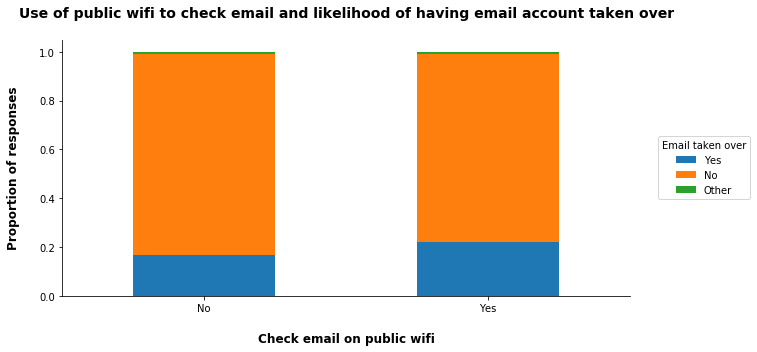

In [30]:
d = pd.DataFrame({'ID': df.ID,
     'secur2d': df.secur2d, # email hacked
     'wifi2d': df.wifi2d}) # check email on public wifi

d = d[d.wifi2d != 0]

d['wifi2d'] = d['wifi2d'].map({1: 'Yes', -1: 'No'})

d = prop_df(d, 'wifi2d', 'secur2d')

stacked = True
xlabel = 'Check email on public wifi'
ylabel = 'Proportion of responses'
title = 'Use of public wifi to check email and likelihood of having email account taken over'
legend = True
legend_title = 'Email taken over'

create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title)

## 3D. Does an individual's password similarity influence their likelihood of having fraudulent charges on their credit/debit card?

### Conclusion
No, individuals with passwords that are mostly different from each other are equally likely to have had fraudulent credit/debit card charges as those with passwords that are mostly similar.

### Visualization

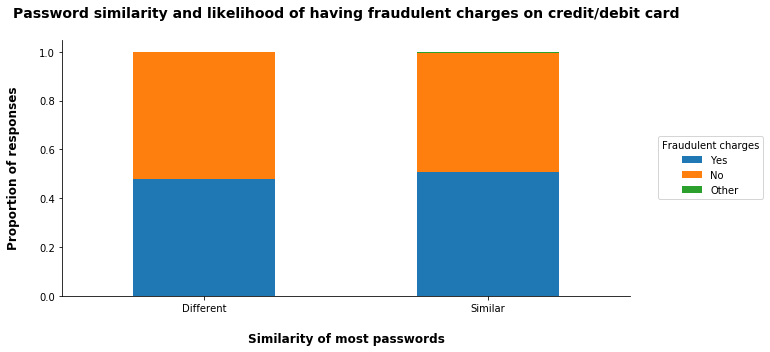

In [31]:
d = pd.DataFrame({'ID': df.ID,
     'secur2c': df.secur2c, # fraudulent charges
     'habits3': df.habits3}) # PW similarity

d = d[d.habits3 != 0]

d['habits3'] = d['habits3'].map({1: 'Similar', 2: 'Different'})

d = prop_df(d, 'habits3', 'secur2c')

stacked = True
xlabel = 'Similarity of most passwords'
ylabel = 'Proportion of responses'
title = 'Password similarity and likelihood of having fraudulent charges on credit/debit card'
legend = True
legend_title = 'Fraudulent charges'

create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title)

## 3E. Does an individual's use of two-factor authentication influence their likelihood of having fraudulent charges on their credit/debit card?

### Conclusion
Yes.  Counter-intuitively, individuals who use two-factor authentication are *more* likely to have had fraudulent credit/debit card charges compared to those who don't use two-factor authentication.

### Visualization

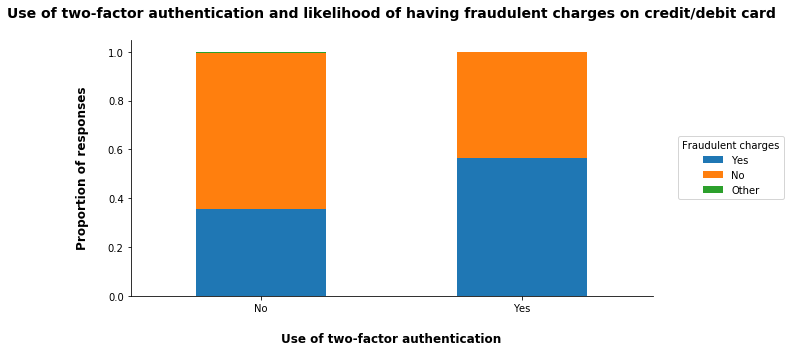

In [32]:
d = pd.DataFrame({'ID': df.ID,
     'secur2c': df.secur2c, # fraudulent charges
     'habits6': df.habits6}) # two-factor auth.

d = d[d.habits6 != 0]

d['habits6'] = d['habits6'].map({1: 'Yes', -1: 'No', 0: 'Other'})

d = prop_df(d, 'habits6', 'secur2c')

stacked = True
xlabel = 'Use of two-factor authentication'
ylabel = 'Proportion of responses'
title = 'Use of two-factor authentication and likelihood of having fraudulent charges on credit/debit card'
legend = True
legend_title = 'Fraudulent charges'

create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title)

## 3F. Does whether an individual makes online purchases while using public wifi influence their likelihood of having fraudulent charges on their credit/debit card?

### Conclusion
Yes, individuals who *do* make online purchases while on public wifi are more likely to have had fraudulent credit/debit card charges compared to those who do *not* make purchases on public wifi.

### Visualization

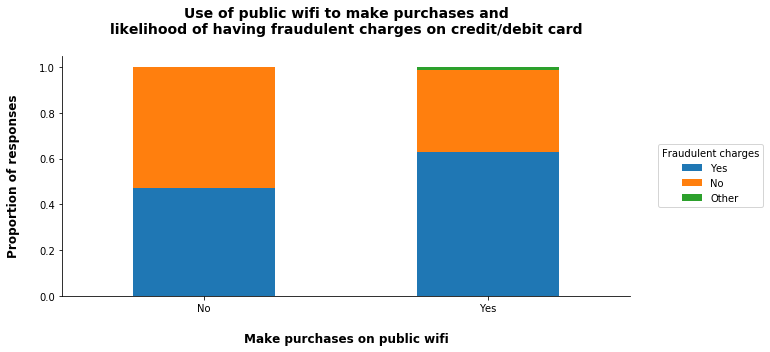

In [33]:
d = pd.DataFrame({'ID': df.ID,
     'secur2c': df.secur2c, # fraudulent charges
     'wifi2a': df.wifi2a}) # purchases on public wifi

d = d[d.wifi2a != 0]

d['wifi2a'] = d['wifi2a'].map({1: 'Yes', -1: 'No', 0: 'Other'})

d = prop_df(d, 'wifi2a', 'secur2c')

stacked = True
xlabel = 'Make purchases on public wifi'
ylabel = 'Proportion of responses'
title = 'Use of public wifi to make purchases and\nlikelihood of having fraudulent charges on credit/debit card'
legend = True
legend_title = 'Fraudulent charges'

create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title)

## 3G. Does whether an individual does banking/financial transactions while using public wifi influence their likelihood of having fraudulent charges on their credit/debit card?

### Conclusion
Yes, individuals who *do* use public wifi to do banking/financial transactions are slightly more likely to have had fraudulent credit/debit card charges compared to those who do not.

### Visualization

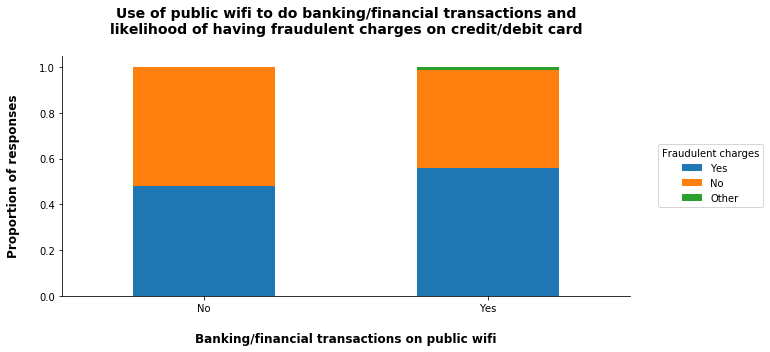

In [34]:
d = pd.DataFrame({'ID': df.ID,
     'secur2c': df.secur2c, # fraudulent charges
     'wifi2b': df.wifi2b}) # banking/financial transactions on public wifi

d = d[d.wifi2b != 0]

d['wifi2b'] = d['wifi2b'].map({1: 'Yes', -1: 'No'})

d = prop_df(d, 'wifi2b', 'secur2c')

stacked = True
xlabel = 'Banking/financial transactions on public wifi'
ylabel = 'Proportion of responses'
title = 'Use of public wifi to do banking/financial transactions and\nlikelihood of having fraudulent charges on credit/debit card'
legend = True
legend_title = 'Fraudulent charges'

create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title)

## 3H. Does an individual's most-used password tracking method influence their likelihood of having fraudulent charges on their credit/debit card?

### Conclusion
Yes, individuals who use a password management system are the most likely to have had fraudulent credit/debit card charges.  (However, it's important to note that only 53 of the respondents reported using a password management system, so conclusions should be taken with caution.)

### Visualization

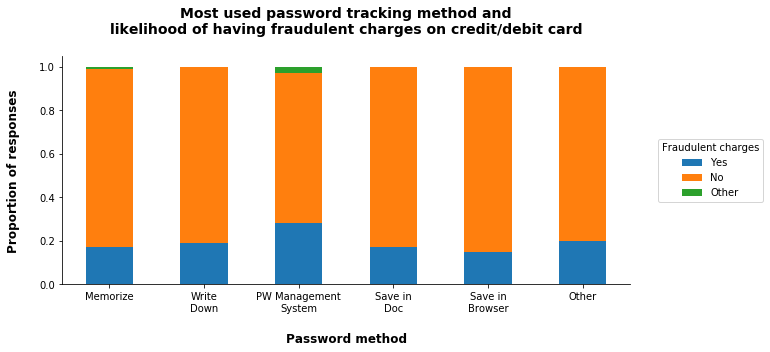

In [35]:
d = pd.DataFrame({'ID': df.ID,
     'secur2a': df.secur2a, # fraudulent charges
     'habits2': df.habits2}) # most-used PW method

d = d[d.habits2 != 0]

d = prop_df(d, 'habits2', 'secur2a')

# Replace numeric labels with meaningful strings for graph
d['new_index'] = (['Memorize', 'Write\nDown', 'PW Management\nSystem', 'Save in\nDoc', 'Save in\nBrowser', 'Other'])
d = d.set_index('new_index')

stacked = True
xlabel = 'Password method'
ylabel = 'Proportion of responses'
title = 'Most used password tracking method and\nlikelihood of having fraudulent charges on credit/debit card'
legend = True
legend_title = 'Fraudulent charges'

create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title)

## 3I. Does an individual's most-used password tracking method influence their likelihood of having their email account taken over?

### Conclusion
Yes, individuals who save their password in their internet browser are the most likely to have their email account taken over.  Those who use a password management system are the least likely.   (However, it's important to note that only 20 respondents reported saving their passwords in their browser, and 53 of the respondents reported using a password management system, so conclusions should be taken with caution.)

### Visualization

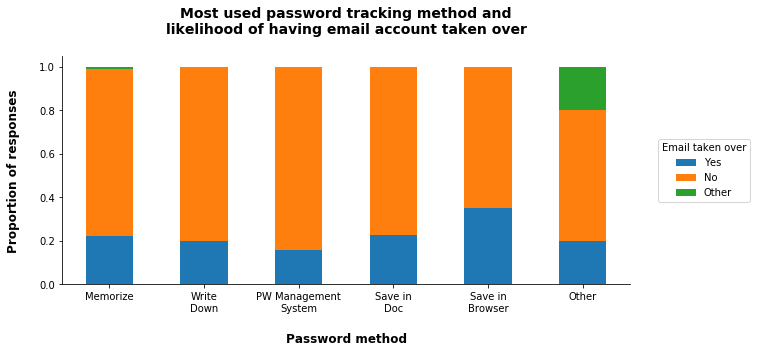

In [36]:
d = pd.DataFrame({'ID': df.ID,
     'secur2d': df.secur2d, # email hacked
     'habits2': df.habits2}) # most-used PW method

d = d[d.habits2 != 0]

d = prop_df(d, 'habits2', 'secur2d')

# Replace numeric labels with meaningful strings for graph
d['new_index'] = (['Memorize', 'Write\nDown', 'PW Management\nSystem', 'Save in\nDoc', 'Save in\nBrowser', 'Other'])
d = d.set_index('new_index')

stacked = True
xlabel = 'Password method'
ylabel = 'Proportion of responses'
title = 'Most used password tracking method and\nlikelihood of having email account taken over'
legend = True
legend_title = 'Email taken over'

create_bargraph(d, stacked, xlabel, ylabel, title, legend, legend_title)